# ML

### 1번

데이터 확인 및 전처리

1.1 EDA 데이터 탐색

1.2 변수간 상관관계를 시각화하고 전처리가 필요함을 설명하라

In [2]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/problem1.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,Amount,Class
0,60.0,1.069141,0.043786,0.309867,1.316694,-0.462394,-0.857888,0.207904,-0.191270,0.056398,0.041567,-0.507358,-0.108666,-0.473257,0.452046,1.005675,0.185441,-0.439976,89.40,0
1,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,0.00,1
2,426.0,-1.932055,1.724618,1.288229,-0.396998,-0.140202,2.470521,-1.865298,-5.186855,0.794764,0.155379,0.034517,0.906738,-0.027172,-0.404303,-0.473949,0.274034,-0.222340,16.19,0
3,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,529.00,1
4,674.0,-0.719065,0.638954,0.686335,-0.023240,2.317890,3.871978,-0.312797,1.089780,-0.596925,-0.006142,-0.242883,-0.384491,0.109079,0.187565,1.823472,0.274346,-0.697730,22.00,0


### EDA

EDA의 주제
* 저항성의 강조 : 이상치 등 부분적 변동에 대한 민감성 확인
* 잔차 계산 : 관찰 값들이 주 경향에서 벗어난 정도 파악
* 자료변수의 재표현 : 변수를 적당한 척도로 바꾸는 것
* 그래프를 통한 현시성 : 분석 결과를 이해하기 쉽게 시각화하는 것


> 막대그래프와 히스토그램
> 상자 그림(Box Plot)
> 산점도(Scatter Plot)
> 상관관계 시각화

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1193 entries, 0 to 1192
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    1193 non-null   float64
 1   V1      1193 non-null   float64
 2   V2      1193 non-null   float64
 3   V3      1193 non-null   float64
 4   V4      1193 non-null   float64
 5   V5      1193 non-null   float64
 6   V6      1193 non-null   float64
 7   V7      1193 non-null   float64
 8   V8      1193 non-null   float64
 9   V9      1193 non-null   float64
 10  V10     1193 non-null   float64
 11  V11     1193 non-null   float64
 12  V12     1193 non-null   float64
 13  V13     1193 non-null   float64
 14  V14     1193 non-null   float64
 15  V15     1193 non-null   float64
 16  V16     1193 non-null   float64
 17  V17     1193 non-null   float64
 18  Amount  1193 non-null   float64
 19  Class   1193 non-null   int64  
dtypes: float64(19), int64(1)
memory usage: 186.5 KB


* 결측값 없는 것 확인

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,Amount,Class
count,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.00000,1193.000000
mean,91514.485331,-0.755027,0.543730,-1.148224,0.777816,-0.409181,-0.283953,-0.852545,0.145026,-0.446390,-0.904275,0.656342,-1.014185,0.011973,-1.168346,0.019232,-0.629529,-1.070657,88.88570,0.167645
std,47896.081947,3.622262,2.663928,3.908787,2.345566,2.702077,1.507579,3.396565,2.471559,1.664075,2.902608,1.957200,2.996734,1.013383,3.230613,0.908008,2.269400,3.812768,220.14133,0.373707
min,60.000000,-30.552380,-33.644637,-31.103685,-4.294888,-22.105532,-10.886820,-37.060311,-37.353443,-11.126624,-23.228255,-2.651584,-17.228662,-2.800154,-18.493773,-4.498945,-14.129855,-25.162799,0.00000,0.000000
25%,50265.000000,-1.302600,-0.435358,-1.609339,-0.610310,-0.842184,-1.017863,-0.806043,-0.219328,-1.039740,-0.883807,-0.601391,-0.967306,-0.692559,-0.950226,-0.549590,-0.701499,-0.682272,3.54000,0.000000
50%,81797.000000,-0.302521,0.231973,-0.234204,0.327567,-0.073622,-0.379633,-0.084983,0.073036,-0.210455,-0.226471,0.283080,-0.014046,0.023014,-0.099055,0.046894,-0.055831,-0.152578,20.99000,0.000000
75%,136995.000000,1.249960,1.112040,0.811507,1.335332,0.684224,0.302350,0.464553,0.454794,0.452561,0.287274,1.212163,0.512121,0.699744,0.419194,0.660619,0.458139,0.368286,77.49000,0.000000
max,172676.000000,2.320621,19.167239,3.324665,12.114672,15.275762,6.268481,8.123589,20.007208,5.916809,7.135948,11.669205,3.106650,3.068228,3.886382,2.869424,3.139656,6.739384,3335.73000,1.000000


In [5]:
# 각 피처별로 몇 가지의 속성을 갖는지 확인

for i in pd.Series(df.columns) :
    unique = pd.Series(df[i].unique())
    if unique.index.stop <10:
        print(i, '유니크')
        print(unique.index)

Class 유니크
RangeIndex(start=0, stop=2, step=1)


* 종속변수인 Class를 제외한 나머지 독립변수들은 여러 개의 속성을 갖는 것을 확인할 수 있다.
    * Class에 따른 데이터 불균형 확인이 필요하다.

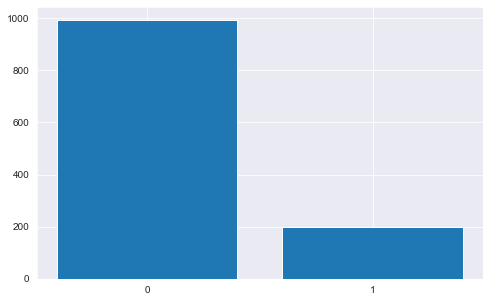

Class 데이터 불균형
Class : 0	 0.8323554065381391
Class : 1	 0.16764459346186086


In [6]:
# class에 따른 데이터 불균형 확인
import matplotlib.pyplot as plt

df['Class'] = df['Class'].astype('str')

plt.figure(figsize = (8, 5))
plt.bar(df['Class'].value_counts().index, df['Class'].value_counts().values)
plt.show()

print('Class 데이터 불균형')
print('Class : 0\t', len(df[df['Class'] == '0']) / len(df))
print('Class : 1\t', len(df[df['Class'] == '1']) / len(df))

df['Class'] = df['Class'].astype('int')

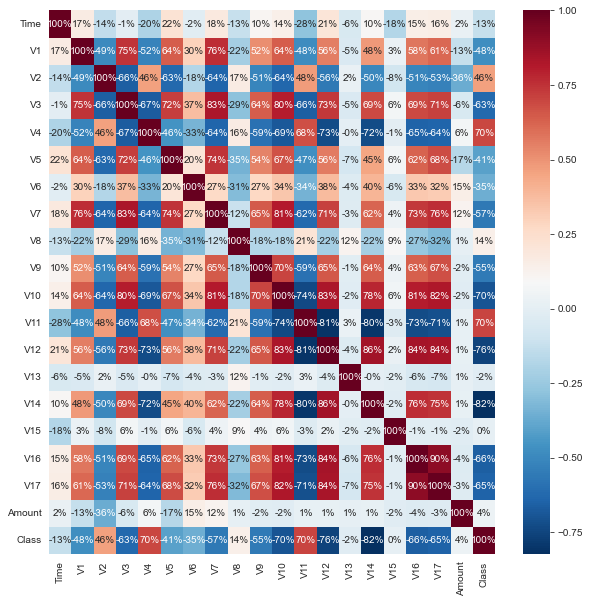

In [7]:
import seaborn as sns

df_corr = df.corr(method = 'pearson')
plt.figure(figsize=(10, 10))
sns.heatmap(df_corr, xticklabels=df.columns, yticklabels=df.columns, cmap='RdBu_r', annot=True, fmt='.0%')
plt.show()

* 상관계수가 0.9 이상인 것은 v16, v17이므로 다중공선성이 발생할 수 있다.
* 또한, 나머지 변수들 간에도 높은 상관관계를 가지고 있는 변수들이 있으므로 전처리가 필요하다.

### 2번 차원축소 (1번이어서)

2.1 차원축소 방법 2가지 이상 비교하고 한가지 선택

2.2 추천한 한 가지를 실제로 수행하고 선택한 이유 설명

* 차원 축소에는 주성분 분석(PCA)과 선형 판별 분석법(LDA)이 있다.


1. PCA
* PCA는 가장 대표적인 차원 축소 기법으로, 여러 변수 간 존재하는 상관관계를 이용하여 이를 대표하는 주성분을 추출해 차원을 축소하는 기법이다.
* 또한, PCA의 핵심은 데이터를 축에 사영했을 때, 가장 높은 분산을 가지는 데이터의 축을 찾아 그  축으로 차원을 축소하는 것인데, 이 축을 주성분이라고 한다.
* 이때, 높은 분산을 갖는 축을 찾는 이유는 정보의 손실을 최소화하기 위함이다.
* 사영했을 때, 분산이 크다는 것은 원래 데이터의 분포를 잘 설명할 수 있다는 것을 뜻한다. 즉, 정보의 손실을 최소화할 수 있다는 것을 뜻한다.
* 유의해야 할 점은 데이터의 스케일에 따라 설명가능한 분산량이 달라질 수 있기 때문에 데이터 스케일링을 꼭 사전에 해주어야 한다.

2. LDA
* LDA는 PCA와 매우 유사하게 입력 데이터 세트를 저차원 공간에 투영해 차원을 축소하는 기법이지만, 중요한 차이는 LDA는 지도학습의 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소한다.
* 즉, PCA는 입력 데이터의 변동성(분산)이 가장 큰 축을 찾지만, LDA는 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾는다.
* 다시 말해, LDA는 클래스 분리를 최대화하는 축을 찾기 위해 클래스 간 분산을 최대화하고, 클래스 내부 분산은 최대한 작게 가져가는 방식이다.
* 이때, 유의해야 할 점은 LDA는 PCA와 다르게 지도학습이기 때문에 클래스의 target 값을 변환 시 넣어줘야 한다.

여기서 나는 PCA를 선정한다. 그 이유는 현재 다중공선성이 의심되는 변수(v16, v17)이 있고, 이외에도 상관관계가 있는 변수들이 존재하기 때문이다.

In [8]:
# PCA 진행
# 설명변수와 종속변수 분리

x = df[df.columns.difference(['Class'])]
y = df['Class']

# StandardScaling 진행
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()

x_scaled = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

pca = PCA(n_components = 10, random_state = 731)
pca.fit(x_scaled)

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_[:7].sum())
# 기존 19개의 설명변수에서 7주성분까지 사용하면, 전체 데이터의 83.6%를 설명할 수 있음을 알 수 있다.

result_pca = PCA(n_components = 7, random_state = 731)
x_scaled_pca = pd.DataFrame(result_pca.fit_transform(x_scaled), columns = ['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7'])
x_scaled_pca

[0.48856528 0.06877926 0.06740491 0.06068848 0.05897547 0.04973451
 0.04187768 0.0350807  0.02420063 0.02270812]
0.8360255972986634


,p1,p2,p3,p4,p5,p6,p7
0,-0.865003,-1.467341,-0.399325,-0.194634,1.372621,0.521872,-0.301514
1,2.585035,-1.092992,-0.878476,-0.854288,1.083653,-0.008949,-1.019354
2,-1.227620,1.044931,0.179199,0.604110,3.061203,-0.819376,-0.096817
3,-0.722942,-2.927350,1.472325,-0.974058,0.934983,-0.002921,0.906362
4,-1.259335,-1.508933,-0.068735,0.351317,2.901062,0.034803,0.619901
...,...,...,...,...,...,...,...
1188,-1.220381,0.132786,-0.257042,0.244148,-1.427011,-0.077240,1.080794
1189,-1.355346,0.207966,-0.532338,-0.070727,-1.174919,0.393451,1.392620
1190,-1.429854,0.346963,-0.084313,0.306085,-1.322735,0.075860,1.052777
1191,-0.564871,1.683795,1.657680,2.214772,-1.060194,0.547957,-0.558149


### 3번 오버샘플링/언더샘플링 (1번이어서)

3.1 오버샘플링과 언더샘플링 장단점 비교 및 선택 구현

3.2 구현 및 알고리즘 2가지 이상 비교, 성능 측정

3.3 현재까지 전처리한 데이터를 통해 모델 수행 후 결과 분석

 * 오버 샘플링 기법은 비중이 적은 데이터를 추가로 생성해 수를 늘려 데이터 불균형을 극복하는 기법이다.
    * 언더 샘플링은 데이터 손실의 문제로 예측 성능이 저하되는 단점이 있으므로, 일반적으로는 불균형한 데이터를 처리하는 방식으로 오버 샘플링을 사용한다.

 * 이때, 오버 샘플링은 Random Oversampling과 SMOTE로 구분할 수 있는데,

> Random Oversampling은
* 소수 클래스에 속하는 데이터의 관측치를 복사하는 방식으로 데이터를 증식한다.
* 데이터를 단순 복사하는 방식이므로 기존의 데이터와 동일한 복제 데이터를 생성한다.
* 이에 따라 소수 클래스에 과적합이 발생할 가능성이 있다는 단점이 있지만, 사용방법이 간단하다는 장점이 있다.

> 한편, SMOTE는
* 적은 데이터 세트에 있는 개별 데이터들의 k-최근접 이웃을 찾아, 해당 데이터와 k개 이웃들의 차이를 일정한 값으로 만들어 기존 데이터와 약간의 차이를 지닌 새로운 데이터를 생성하는 방식이다.
* SMOTE는 Random Oversampling보다 처리 속도가 느리다는 단점이 잇지만, 데이터를 단순히 동일하게 증식시키는 방식이 아니기 때문에, 과적합 문제를 예방할 수 있는 장점이 있다.

이에 따라 Random Oversampling과 SMOTE를 선정한다.

In [9]:
# 종속변수인 Class에 대하여 Random Oversamplig, SMOTE 진행

from imblearn.over_sampling import RandomOverSampler, SMOTE
ros = RandomOverSampler(random_state = 731)
smt = SMOTE(random_state = 731)

import time
# Random Oversampling
ros_start_time = time.time() # 시작 시간
x_ros, y_ros = ros.fit_resample(x_scaled_pca, y)
ros_end_time = time.time() # 종료 시간
print('ros_time : ', ros_end_time - ros_start_time)

# SMOTE
smt_start_time = time.time() # 시작 시간
x_smt, y_smt = smt.fit_resample(x_scaled_pca, y)
smt_end_time = time.time() # 종료 시간
print('smt_time : ', smt_end_time - smt_start_time)

ros_time :  0.005715131759643555
smt_time :  0.007025957107543945


 * 생각보다 속도 측면에서는 성능 차이가 별로 나지 않는 것 같다.
 * 정확도 측면에서의 성능 차이 확인이 필요하다.

In [10]:
# 모델 RandomForest Classification을 이용하여 정확도 측면에서의 성능 차이 확인
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf_clf = RandomForestClassifier(n_estimators = 300, max_depth = 10, criterion = 'entropy')

# train, test 분리
from sklearn.model_selection import train_test_split

# ros
x_train_ros, x_test_ros, y_train_ros, y_test_ros = train_test_split(x_ros, y_ros, test_size = 0.3, stratify = y_ros, random_state = 731)

# smt
x_train_smt, x_test_smt, y_train_smt, y_test_smt = train_test_split(x_smt, y_smt, test_size = 0.3, stratify = y_smt, random_state = 731)

import time

# 1. ros
ros_start_time = time.time()
rf_clf.fit(x_train_ros, y_train_ros)
ros_end_time = time.time()
ros_pred = rf_clf.predict(x_test_ros)

print('Accuracy : ', rf_clf.score(x_test_ros, y_test_ros))
print('time : ', ros_end_time - ros_start_time, 'seconds')

# 2. smt
smt_start_time = time.time()
rf_clf.fit(x_train_smt, y_train_smt)
smt_end_time = time.time()
smt_pred = rf_clf.predict(x_test_smt)

print('Accuracy : ', rf_clf.score(x_test_smt, y_test_smt))
print('time : ', smt_end_time - smt_start_time, 'seconds')

Accuracy :  0.9899328859060402
time :  0.6180458068847656 seconds
Accuracy :  0.9513422818791947
time :  0.5814180374145508 seconds


* 희한하게 내가 하면 ros가 smt보다 시간도 빠르고 정확도 측면도 좋다.
* macro_avg도 확인해봐야겠다.

In [11]:
print('report of ros')
print(classification_report(y_test_ros, ros_pred))
print('='*20)
print('report of smt')
print(classification_report(y_test_smt, smt_pred))

report of ros
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       298
           1       0.98      1.00      0.99       298

    accuracy                           0.99       596
   macro avg       0.99      0.99      0.99       596
weighted avg       0.99      0.99      0.99       596

report of smt
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       298
           1       0.98      0.93      0.95       298

    accuracy                           0.95       596
   macro avg       0.95      0.95      0.95       596
weighted avg       0.95      0.95      0.95       596



* 이제 나도 모르겠다 잘..

### 4번 이상탐지 (1번이어서)

4.1 이상탐지 모델 2가지 이상 기술, 장/단점 설명

4.2 2번에서 만든 데이터로 한 가지 이상탐지 모델을 구현하고, 3번에서 만든 모델과 비교

4.3 데이터분석과 관점에서 3번에서 만든 모델과 4번에서 만든 모델 설명

* 이건 솔직히 잘 모르겠다. TBU

---

# SA

### 5번 
2년 전 제품 생산량이 100,000개, 1년 전 제품 생산량이 150,000개, 그 후 팩토리 기술의 상승으로 제품 생산량이 250,000개 되었을 때, 연평균 상승률의 대푯값을 구하시오. (반올림하여 소수점 아래 둘째자리까지 표기하시오.)

In [12]:
# 기하 평균 구하면 될 듯
import numpy as np

a1=100000
a2=150000
a3=250000

r1 = a2/a1
r2 = a3/a2
geo_mean = np.sqrt(r1*r2) - 1
print('연평균 상승률 : ', round(geo_mean*100, 2), '%')

연평균 상승률 :  58.11 %


### 6번
12건의 광고 시간 측정. 평균 15.5초, 분산 3.2초 일때 90% 신뢰구간은?

In [13]:
import numpy as np
from scipy import stats

n = 12 # 표본 개수
dof = 11  # 자유도
m = 15.5 # 평균
var = 3.2 # 분산
std = np.sqrt(var) # 표준편차

print(stats.t.interval(alpha = 0.9, df = dof, loc = m, scale = std))

(12.287423572494966, 18.71257642750503)


### 7번
강의 상류와 하류의 생물 다양성 점수에 차이가 있는지 검정하시오. (단, 같은 강에서 상류와 하류는 서로 독립적이지 않으며, 종속적인 관계에 있다.)

7.1 귀무가설과 대립가설을 세우시오

7.2 검정 통계량과 유의 확률을 구하고, 연구가설 채택여부를 검정하시오.


|idx|River|up|down|
|:--:|:--:|:--:|:--:|
|0|A|57.1|45.7|
|1|B|51.6|37.2|
|2|C|53.9|53.3|
|3|D|59.0|54.3|
|4|E|57.5|46.3|


* 귀무가설 : 강의 상류와 하류의 생물 다양성 점수에 차이가 없다.
* 대립가설 : 강의 상류와 하류의 생물 다양성 점수에 차이가 있다.

점수에 차이가 있는지 확인하기 위한 검정 방법으로 t 검정을 선정한다.

t 검정
* 단일모집단에 대해 어떠한 처리를 가했을 때, 처리 전후에 따른 평균의 차이를 비교할 때 사용한다.
* 표본 내 개체들에 대하여 두 번의 측정을 한다.(같은 집단이므로 등분산성을 만족한다.)

  > **가설(대응표본)**
  > 
  > * H0 : 두 집단의 값 차이의 중앙값은 0이다.(= 값의 차이가 없다.)
  > * H1 : 두 집단의 값 차이의 중앙값은 0이 아니다.(= 값의 차이가 있다.)
  
검정 방법
* shapiro 검정을 통해 정규성을 확인하고,
  * 정규성을 만족하는 경우 `stats.ttest_rel(X_pre.variable, X_post.variable)`를 이용하여 t-test를 진행한다.
  * 정규성을 만족하지 않는 경우 윌콕슨의 부호 순위 검정을 이용한다. (`stats.Wilcoxon(X_pre.variable, X_post.variable, alternative = 'greater' or 'less' or 'two_sided')`)

In [14]:
# df 구성
import pandas as pd
river = ['A', 'B', 'C', 'D', 'E']
up = [57.1, 51.6, 53.9, 59.0, 57.5]
down = [45.7, 37.2, 53.3, 54.3, 46.3]
df = pd.DataFrame({'river': river,
                   'up' : up,
                   'down' : down})
df

,river,up,down
0,A,57.1,45.7
1,B,51.6,37.2
2,C,53.9,53.3
3,D,59.0,54.3
4,E,57.5,46.3


In [15]:
# 정규성 확인
# 귀무가설(H0) : 정규성을 가진다.
    # 즉, 데이터가 정규분포를 따른다.
# 대립가설(H1) : 정규성을 가지지 않는다.
    # 즉, 데이터가 정규분포를 따르지 않는다.
import scipy.stats as stats
from scipy.stats import shapiro

print('1 - (1). before에 대한 샤피로 검정(정규성 검정)')
print('첫번째값(검정통계치) : ', shapiro(df['up'])[0])
print('두 번째값(p-value) : ', shapiro(df['up'])[1])
print('1 - (2). after에 대한 샤피로 검정(정규성 검정)')
print('첫번째값(검정통계치) : ', shapiro(df['down'])[0])
print('두 번째값(p-value) : ', shapiro(df['down'])[1])
print('\n=====\n')

# p-value가 유의수준보다 크므로 귀무가설을 채택한다.
    # 즉, before와 after 두 데이터는 모두 정규성을 갖는다.
    # 이에 따라 ttest 진행
print('2. t-검정')
print('첫번째값(검정통계치) : ', stats.ttest_rel(df['up'], df['down'], alternative = 'greater')[0])
print('두 번째값(p-value) : ', stats.ttest_rel(df['up'], df['down'], alternative = 'greater')[1])

# p-value가 유의수준보다 작으므로 귀무가설을 기각하고 대립가설을 채택한다. 즉, '강의 상류와 하류의 생물 다양성 점수에 차이는 통계적으로 유의하다.'고 해석할 수 있다.
    # 또한, alternative를 greater로 설정했기 때문에 'up이 down보다 크다. 즉, 강의 상류의 생물 다양성 점수는 하류의 생물 다양성 점수보다 크다.'는 결론을 낼 수 있다.

1 - (1). before에 대한 샤피로 검정(정규성 검정)
첫번째값(검정통계치) :  0.9285793304443359
두 번째값(p-value) :  0.5867148637771606
1 - (2). after에 대한 샤피로 검정(정규성 검정)
첫번째값(검정통계치) :  0.9143500328063965
두 번째값(p-value) :  0.4941674470901489

=====

2. t-검정
첫번째값(검정통계치) :  3.3526056764717995
두 번째값(p-value) :  0.014249888617026644


### 8번  user_counts를 종속변수로 하는 데이터이다

8.1 분위수 회귀분석 (Quantile Regression) 을 사용하여 회귀 계수를 구하시오. (반올림하여 소수점 아래 둘째자리까지 표기하시오.)

8.2 8.1의 모델의 회귀계수를 활용하여 temperature : 10.5 , wind : 8.2 , precipitation : 3.5 일때 user_counts를 예측하시오

* [참고한 자료](https://jonsyou.tistory.com/14)

In [16]:
# df 불러오기
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/problem8.csv')
df.head()

,temperature,wind,precipitation,user_counts
0,10.400000,4.600,0.844944,6368
1,5.666667,4.625,0.040860,5902
2,4.933333,4.725,0.008696,6226
3,3.400000,2.675,0.156989,5829
4,8.900000,3.950,7.988462,7589


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   temperature    2097 non-null   float64
 1   wind           2097 non-null   float64
 2   precipitation  2097 non-null   float64
 3   user_counts    2097 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 65.7 KB


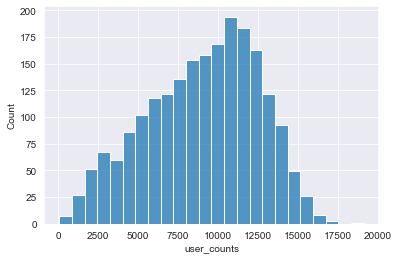

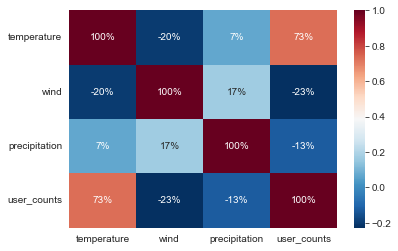

In [18]:
# 분위수 회귀분석 시작하기 전에 기본적인 내용 확인
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['user_counts'])
plt.show()

# 히트맵 그려볼까
df_corr = df.corr(method = 'pearson')
sns.heatmap(df_corr, annot = True, xticklabels=df.columns, yticklabels=df.columns, cmap='RdBu_r', fmt='.0%')
plt.show()

# user_counts는 temperature와 상관성이 많은 것을 일단 확인

In [19]:
import statsmodels.formula.api as smf
print(df.head(3))

for q in [0.5] :
    formula = 'user_counts ~ temperature + wind + precipitation'
    model = smf.quantreg(formula, df)
    result = model.fit(q=q) 
    print('quantile = ', q )
    print(result.summary())

    names = result.params[1:].index
    values = result.params[1:].values
    print('\n\n답안 : 각 회귀 계수. 소수점 2자리 반올림')

    for name, val in zip(names, values) :
        print(name, ':', round(val, 2))

   temperature   wind  precipitation  user_counts
0    10.400000  4.600       0.844944         6368
1     5.666667  4.625       0.040860         5902
2     4.933333  4.725       0.008696         6226
quantile =  0.5
                         QuantReg Regression Results                          
Dep. Variable:            user_counts   Pseudo R-squared:               0.3723
Model:                       QuantReg   Bandwidth:                       840.9
Method:                 Least Squares   Sparsity:                        5590.
Date:                Wed, 31 May 2023   No. Observations:                 2097
Time:                        21:10:24   Df Residuals:                     2093
                                        Df Model:                            3
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5941.8395    198.127     29.990      0.000    5553.2

In [20]:
# 8-2
# 8-1 모델의 회귀계수를 활용하여 temperature: 10.5, wind: 8.2, precipitation: 3.5 일때 user_counts를 예측하시오

df_sample = pd.DataFrame(data={'temperature':[10.5], 'wind': [8.2], 'precipitation': [3.5]})
y_predict = result.predict(df_sample)
print('user_counts:', (y_predict.values[0]).astype('int'))

user_counts: 7412


### 9번
지하철 호선과 월별, 승객 수 간 상관관계가 있는지 확인(Type III Anova 사용)

9.1 귀무가설과 대립가설 설정하라

9.2 통계량을 구하고, 대립가설 채택여부를 기술하라

* 귀무가설 : 지하철 호선과 월별, 승객 수 간에는 상관관계가 없다.
* 대립가설 : 지하철 호선과 월별, 승객 수 간에는 상관관계가 있다.

In [21]:
# df 불러오기
df_subway = pd.read_csv('https://github.com/johyunkang/adp_certificate/files/10883822/subway.csv')
print(df_subway.head())

   line  month  total
0     1      1   1310
1     1      2   1300
2     1      3   1305
3     1      4   1200
4     1      5   1301


In [22]:
# type 3 ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols
# the following model statement will be used for Type I, Type II, and Type III ANOVA
model = ols('total ~ line * month', data=df_subway).fit()
print(model.summary())

# setting typ as Type I ANOVA in Python
aov_table = sm.stats.anova_lm(model, typ=3)
print(aov_table)

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.038
Method:                 Least Squares   F-statistic:                    0.1437
Date:                Wed, 31 May 2023   Prob (F-statistic):              0.933
Time:                        21:10:25   Log-Likelihood:                -475.01
No. Observations:                  72   AIC:                             958.0
Df Residuals:                      68   BIC:                             967.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1379.3788    121.348     11.367      0.0

p-value가 모두 유의수준 0.05보다 크므로 귀무가설을 채택한다.
즉, 모든 변수 간에 상관관계가 없다.

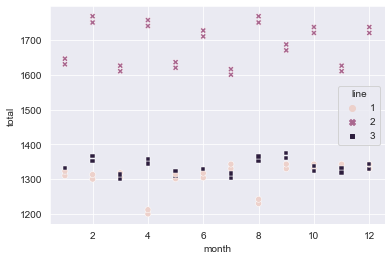

In [23]:
# 궁금해서 히트맵 확인
import seaborn as sns

sns.scatterplot(x='month', y='total', data = df_subway, hue = 'line', style = 'line')
plt.show()